Frozen lake
1. Q learning
2. Linear q learning -> Make sure for Q learning the onestep lookahead is really taking the maximum
3. Double q learning (non linear)
4. Value function
5. Ac
6. Once im done with these ^
7. Swap to MC if necessary
8. Swap to mid price (keep reward fn of bid ask spread)
9. Pretraining

In [1]:
import random
from time import sleep
from IPython.display import clear_output

import gym
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.optim as optim
from torch import nn
from torch.utils.data import DataLoader
from torch.distributions.categorical import Categorical

from commons.replay_memory import ReplayMemory, Experience

%matplotlib inline

In [2]:
device = 'cuda:1' if torch.cuda.is_available() else 'cpu'

In [3]:
env = gym.make('FrozenLake-v1')

Learning points:
- In Q Learning the exploration-exploitation tradeoff is really important. The agent MUST explore
- The discount rate is really important for feeding information back in time, always try it with different values
- Learning rate is important for stability, need to slowly move to the target, also know that the target will move too

In [4]:
epochs = 50000
steps = 5000

gamma = 0.99
alpha = 0.1

rewards = []
ep_steps = []

q_table = np.zeros((env.observation_space.n, env.action_space.n))

for epoch in range(1, epochs + 1):
    state = env.reset()
    is_done = False
    rwd = 0
    for i in range(steps):
        if is_done:
            break
        exploration_prob = random.uniform(0, 1)
        if exploration_prob > (epoch/epochs)**2:
            action = env.action_space.sample()
        else:
            action = q_table[state, :].argmax()
        nxt_state, reward, is_done, _ = env.step(action)
        nxt = reward + gamma * q_table[nxt_state,:].max()
        q_table[state, action] += alpha * (nxt - q_table[state, action])
        state = nxt_state
        rwd += reward
    rewards.append(rwd)
    ep_steps.append(i)
    print(f"Epoch: {epoch}", end="\r")


In [5]:
pd.Series(rewards).sum()

4200.0

<AxesSubplot:>

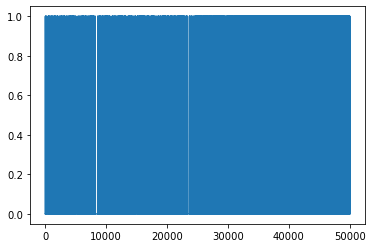

In [6]:
pd.Series(rewards).plot()

In [7]:
(pd.Series(rewards)[-500:] == 1).mean()
# Win rate

0.634

<AxesSubplot:>

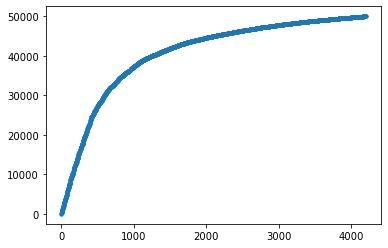

In [8]:
pd.Series((pd.Series(rewards) > 0.5)[(pd.Series(rewards) > 0.5)].index).plot(marker='.')
# Win rate over time

<AxesSubplot:>

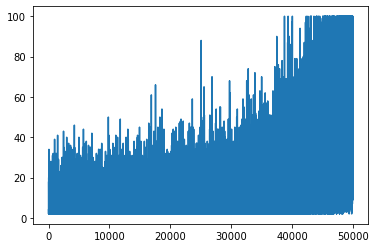

In [9]:
pd.Series(ep_steps).plot()

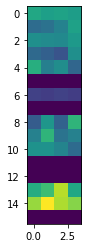

In [10]:
plt.imshow(q_table)

In [11]:
pd.Series(rewards)[-1000:].mean()

0.615

In [12]:
env.close()

In [13]:
env.reset()

0

In [14]:
is_done = False
state = env.reset()
env.render()
while not is_done:
    sleep(0.01)
    action = q_table[state, :].argmax()
    next_state, reward, is_done, info = env.step(action)
    env.render()
    
    state = next_state
    if reward == 1:
        print("Won")
    clear_output(wait=True)

  (Down)
SFFF
FHFH
FFFH
HFFG
Won
